## Изучение данных.

In [1]:
import pandas as pd # Импорт билиотеки pandas и сохранение в переменной pd.
import matplotlib.pyplot as plt # Импорт библиотеки matplotlib и сохранение в переменной plt.
import seaborn as sns # Импорт библиотеки seaborn и сохранение в переменной sns.
from scipy import stats as st # Импорт из библиотеки scipy модуль stats и сохранение в переменной st.
import numpy as np # Импорт библиотеки numpy и сохранение в переменной np.

In [2]:
games_data = pd.read_csv('/datasets/games.csv') # Чтение данных и сохранение в переменной games_data.

In [3]:
games_data.info() # Вывод общей информации.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
Name               16713 non-null object
Platform           16715 non-null object
Year_of_Release    16446 non-null float64
Genre              16713 non-null object
NA_sales           16715 non-null float64
EU_sales           16715 non-null float64
JP_sales           16715 non-null float64
Other_sales        16715 non-null float64
Critic_Score       8137 non-null float64
User_Score         10014 non-null object
Rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Описание данных

    Name — название игры
    Platform — платформа
    Year_of_Release — год выпуска
    Genre — жанр игры
    NA_sales — продажи в Северной Америке (миллионы проданных копий)
    EU_sales — продажи в Европе (миллионы проданных копий)
    JP_sales — продажи в Японии (миллионы проданных копий)
    Other_sales — продажи в других странах (миллионы проданных копий)
    Critic_Score — оценка критиков (максимум 100)
    User_Score — оценка пользователей (максимум 10)
    Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

Данные за 2016 год могут быть неполными.

In [4]:
games_data.describe() # Вывод статистики.

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


### Вывод.

После первичного знакомства с данными обнаружилось сразу несколько проблем:
1. В нескольких столбцах присутствуют пропуски.
2. Названия столбцов необходимо привести к нижнему регистру.
3. Столбец с годом выпуска игры необходимо привести к типу int, так как в нём есть только год, и он может быть только целым числом.
4. Столбец с прейтингом пользователей также необходимо привести к числовому типу.

Метод describe показал, что в столбцах по продажам в разных странах данные сосредоточены, в основном, в третей квартиле.

## Предобработка данных.

Для подготовки данных нам необходимо сделать следующее:
1. Заменить названия столбцов (привести к нижнему регистру);
2. Преобразовать данные в нужные типы;
3. Обработать пропуски при необходимости;
4. Посчитать суммарные продажи во всех регионах.

### Замена названий столбцов.

In [5]:
games_data.columns = games_data.columns.str.lower() # Приведение названий столбцов к нижнему регистру.

In [6]:
games_data.info() # Проверка результата работы функции.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
name               16713 non-null object
platform           16715 non-null object
year_of_release    16446 non-null float64
genre              16713 non-null object
na_sales           16715 non-null float64
eu_sales           16715 non-null float64
jp_sales           16715 non-null float64
other_sales        16715 non-null float64
critic_score       8137 non-null float64
user_score         10014 non-null object
rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


### Преобразование типов данных.

In [7]:
games_data.head() # Посмотрим на данные в таблице, выведем первые 5 строчек.

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [8]:
games_data['year_of_release'] = games_data['year_of_release'].astype('Int64') # Приведение столбца year_of_release к типу int.

### Обработка пропусков.

In [9]:
games_data.isna().sum() # Подсчёт пропусков.

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64

 * В 6 столбцах из 11 присутствуют пропущенные значения. 
 * Пропуски в столбцах 'year_of_release', 'name' и 'genre', составляют меньше 1 процента от объёма данных, поэтому их можно удалить.
 * Столбцы с рейтингом игр от критиков и пользователей можно попробовать заполнить средним значением рейтинга относительно жанра игры и платформы. Однако рейтинг игры не зависит на прямую от жанра и платформы, на которой она вышла, а только от авторов. Информации по авторам у нас нет. 
 * Пропуски в столбце с возрастным рейтингом могут повлиять на конечный результат исследования, так как нам необходимо узнать количество проданных игр по этим возрастным категориям, поэтому их лучше заполнить значением-заглушкой, например: 'unknown'.

In [10]:
games_data[games_data['name'].isna()] # Посмотрим на строки с пропусками в столбце 'name'. 

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


Пропуски в столбцах 'genre' и 'name' находятся на одних и тех же строках. В столбцах с оценками и рейтингом также стоят пропуски. Удаление этих строк не повлияет на исследование, так как их мало и в других столбцах также отсутствуют данные.

In [11]:
games_data = games_data.dropna(subset=['name', 'genre'])
games_data.isna().sum()

name                  0
platform              0
year_of_release     269
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8576
user_score         6699
rating             6764
dtype: int64

В столбце user_score присутствует значение tbd из-за которого нельзя изменить тип на числовой. Так как столбец отражает рейтинг игр, на нулевое значение его тоже нельзя заменить, потому что у игры не может быть нулевой рейтинг. 

In [12]:
games_data['user_score'] = games_data['user_score'].replace('tbd', None) # Замена значения tbd на None.

In [13]:
games_data['user_score'] = pd.to_numeric(games_data['user_score']) # Приведение столбца user_score к типу float. 

In [14]:
games_data['rating'] = games_data['rating'].fillna('Unknown') # Заполним пропуски в столбце 'raing' значением 'Unknown'.
games_data.isna().sum()

name                  0
platform              0
year_of_release     269
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8576
user_score         7953
rating                0
dtype: int64

### Сумма продаж.

Подсчёт общей суммы продаж во всех регионах и сохранение в отдельном столбце.

In [15]:
games_data['total_sales'] = games_data['na_sales']+games_data['eu_sales']+games_data['jp_sales']+games_data['other_sales']

### Вывод.

На данном этапе были выполнены следующие шаги:
1. Изменены названия столбцов.
2. Изменены типы данных в столбцах year_of_release и user_score.
3. Пропуски не были заполнены, так как доступные данные не позволяют определить зависимость рейтинга игр от других факторов. Успешность игры зависит от авторов и от разработчика, но такой информации у нас нет.
4. Посчитана сумма продаж во всех регионах.

## Исследовательский анализ.

При проведении исследовательского анализа будут выполнены следующие шаги:
1. Посмотреть, сколько игр выпускалось в разные годы.
2. Посмотреть, как менялись продажи по платформам. Выбрать платформы с наибольшими суммарными продажами и построить распределение по годам.
3. Взять данные за соответствующий актуальный период. Актуальный период определить самостоятельно в результате исследования предыдущих вопросов. Основной фактор — эти данные помогут построить прогноз на 2017 год.
4. Какие платформы лидируют по продажам, растут или падают? Выбрать несколько потенциально прибыльных платформ.
5. Построить график «ящик с усами» по глобальным продажам игр в разбивке по платформам.
6. Посмотреть, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков.
8. Посмотреть на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?

### Количество игр.

Text(0, 0.5, 'Количество игр.')

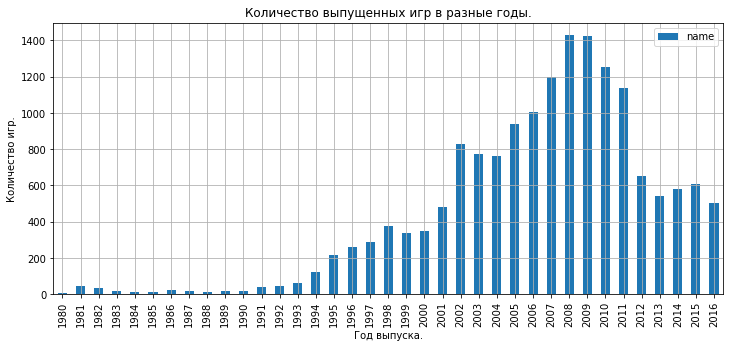

In [16]:
# Построение графика, отражающего количество игр, выпущенных по годам.
games_data.pivot_table(index='year_of_release', values='name', aggfunc='count').plot(kind='bar', grid=True, figsize=(12, 5))
plt.title('Количество выпущенных игр в разные годы.')
plt.xlabel('Год выпуска.')
plt.ylabel('Количество игр.')

До 1995 года игр выпускалось очень мало, далее начался стабильный рост до 2009. Наибольшее количество игр было выпущено в 2008 и 2009 годах, после 2010 года количество выпущенных игр резко сократилось.

### Игровые платформы.

Text(0, 0.5, 'Сумма продаж, млн. копий.')

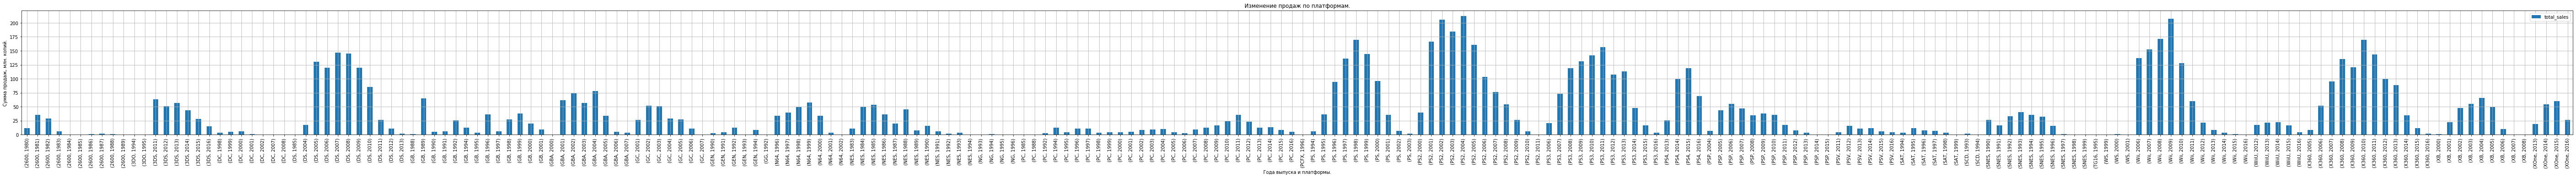

In [17]:
# Создание сводной таблицы для игровых платформ по годам, расчёт суммы продаж для каждой платформы по годам
# и построение графика распределения.
(games_data.pivot_table(index=(['platform', 'year_of_release']), values='total_sales', aggfunc='sum')
     .plot(kind='bar', grid=True, figsize=(100, 5)))
plt.title('Изменение продаж по платформам.')
plt.xlabel('Года выпуска и платформы.')
plt.ylabel('Сумма продаж, млн. копий.')

Из графика видно, что платформы с наибольшими суммарными продажами это: DS, PS, PS2, PS3, PS4, Wii и Xbox360. Для них необходимо построить распределение по годам. 

Text(0, 0.5, 'Сумма продаж, млн. копий.')

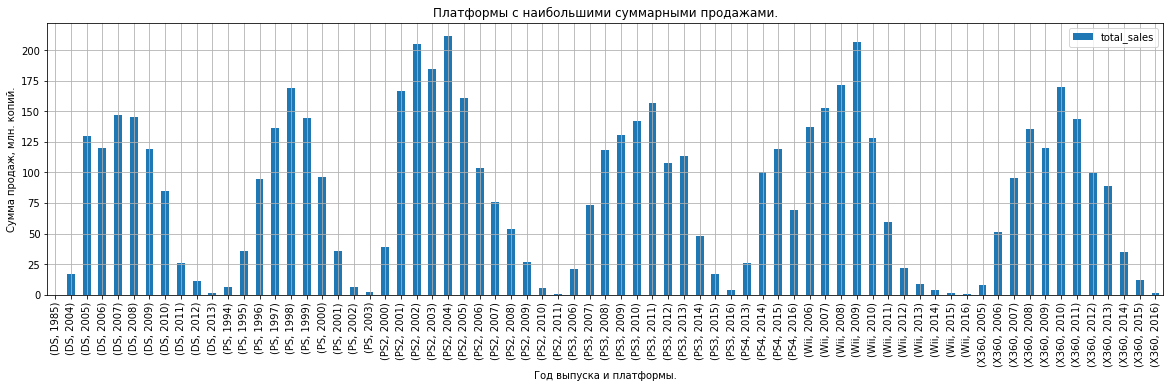

In [18]:
# Создание среза по названиям популярных игровых платформ и построение столбчатой диаграммы по годам.
((games_data.query('platform in ("DS", "PS", "PS2", "PS3", "PS4", "Wii", "X360")'))
    .pivot_table(index=(['platform', 'year_of_release']), values='total_sales', aggfunc='sum')
    .plot(kind='bar', grid=True, figsize=(20, 5)))
plt.title('Платформы с наибольшими суммарными продажами.')
plt.xlabel('Год выпуска и платформы.')
plt.ylabel('Сумма продаж, млн. копий.')

На примере игровой платформы PS можно проследить динамику появления новых и исчезновения старых платформ. Среднее время жизни игровой платформы - 10 лет. Для всех платформ срок жизни можно поделить на 3 части: рост продаж, пик популярности и спад продаж. Время за которое платформа становится популярна - примерно 3 года. Это будет актуальный период для следующего шага исследования.

In [19]:
games_data_actual = games_data.query('year_of_release>=2014') # Выборка данных не позднее 2014 года и сохранение в переменной.

Text(0, 0.5, 'Сумма продаж, млн. копий.')

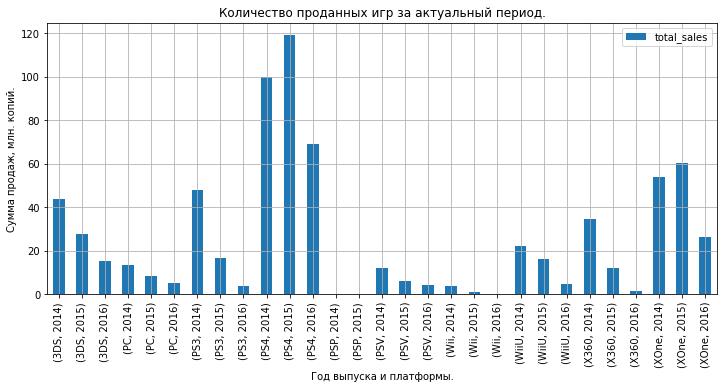

In [20]:
# Создание сводной таблицы по годам с 2014 и построение столбчатой диаграммы по годам и платформам. 
(games_data_actual.pivot_table(index=(['platform', 'year_of_release']), values='total_sales', aggfunc='sum')
    .plot(kind='bar', grid=True, figsize=(12, 5)))
plt.title('Количество проданных игр за актуальный период.')
plt.xlabel('Год выпуска и платформы.')
plt.ylabel('Сумма продаж, млн. копий.')

 * Продажи игр на всех платформах за актуальный период снижаются. Возможно это связано с неполнотой данных за 2016 год. В таком случае перспективными платформами выглядят PS4 и XOne, так как с учётом предыдущих графиков эти платформы появились в 2013 годах, и находятся на пике продаж. 
 * Также к перспективным платформам можно добавить 3DS и PC. 
 * Персональные компьютеры имеют неограниченный цикл жизни, так как их можно модернизировать неограниченное число раз и всегда поддерживать в актуальном состоянии. 
 * У платформы 3DS пока не появился преемник, поэтому она также будет продаваться длительное время. Остальные платформы не популярны, и наблюдается явный спад.

In [21]:
# Срез по перспективным платформам за актуальный период и сохранение в переменную.
games_data_platform = games_data.query('platform in ("PS4", "XOne", "3DS", "PC") and year_of_release>=2014')

/opt/conda/lib/python3.7/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


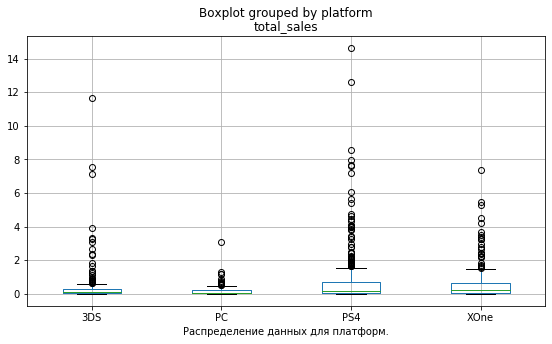

In [22]:
# Построение 'ящика с усами'. 
games_data_platform.boxplot(column='total_sales', by='platform', figsize=(9, 5))
plt.xlabel('Распределение данных для платформ.')
plt.show()

Полученный график показывает распределение данных для платформ PS4, XOne, 3DS и PC. В данных довольно много выбросов и на таком графике не видно как распределены данные по квартилям. Необходимо увеличить масштаб.

/opt/conda/lib/python3.7/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


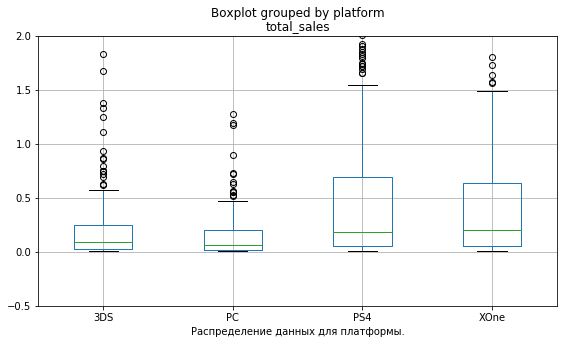

In [23]:
# Построение 'ящика с усами' в увеличенном масштабе. 
games_data_platform.boxplot(column='total_sales', by='platform', figsize=(9, 5))
plt.ylim(-0.5,2)# Изменение масштаба по оси ординат.
plt.xlabel('Распределение данных для платформы.')
plt.show()

Данные скошены вправо для всех платформ в сторону 1 квартили, среднее значение больше медианы.

### Отзывы пользователей и критиков.

Наиболее популярная игровая платформа за актуальный период - PS4. Рассмотрим зависимость продаж от отзывов критиков и пользователей.

Text(0, 0.5, 'Количество продаж, млн. копий.')

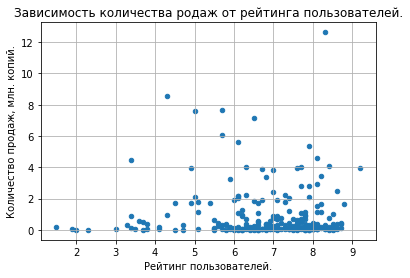

In [24]:
# Создание среза для платформы PS4 за актуальный период и постройка диаграммы рассеяния для отзывов пользователей и продаж.
((games_data.query('platform in "PS4" and year_of_release>=2014'))
    .plot(x='user_score', y='total_sales', kind="scatter", grid=True))
plt.title('Зависимость количества родаж от рейтинга пользователей.')
plt.xlabel('Рейтинг пользователей.')
plt.ylabel('Количество продаж, млн. копий.')

На графике можно увидеть, что чаще продаются игры с более высоким пользовательским рейтингом. Также есть выбивающиеся значения показывающие, что не всегда плохой рейтинг пользователей говорит о низких продажах игры.

Text(0, 0.5, 'Количество продаж, млн. копий.')

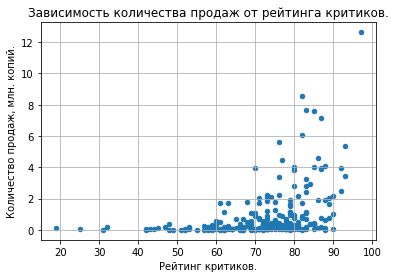

In [25]:
# Создание среза для платформы PS4 за актуальный период и постройка диаграммы рассеяния для отзывов критиков и продаж.
((games_data.query('platform in "PS4" and year_of_release>=2014'))
    .plot(x='critic_score', y='total_sales', kind="scatter", grid=True))
plt.title('Зависимость количества продаж от рейтинга критиков.')
plt.xlabel('Рейтинг критиков.')
plt.ylabel('Количество продаж, млн. копий.')

На графике видно, что с ростом оценки критиков, продажи растут по экспоненте.

In [26]:
# Определение коэффициента Пирсона для отзывов и количества проданных игр.
(games_data.query('platform in "PS4" and year_of_release>=2014'))[['user_score', 'critic_score', 'total_sales']].corr()

,user_score,critic_score,total_sales
user_score,1.000000,0.544457,-0.035010
critic_score,0.544457,1.000000,0.402661
total_sales,-0.035010,0.402661,1.000000


Количество проданных копий игр линейно зависит от отзывов критиков, но нет линейной зависимости от отзывов пользователей.

Теперь необходимо рассмотреть такуюже зависимость между отзывами и количеством продаж для остальных платформ за актуальный период.

In [27]:
platform_data = games_data.query('year_of_release>=2014')

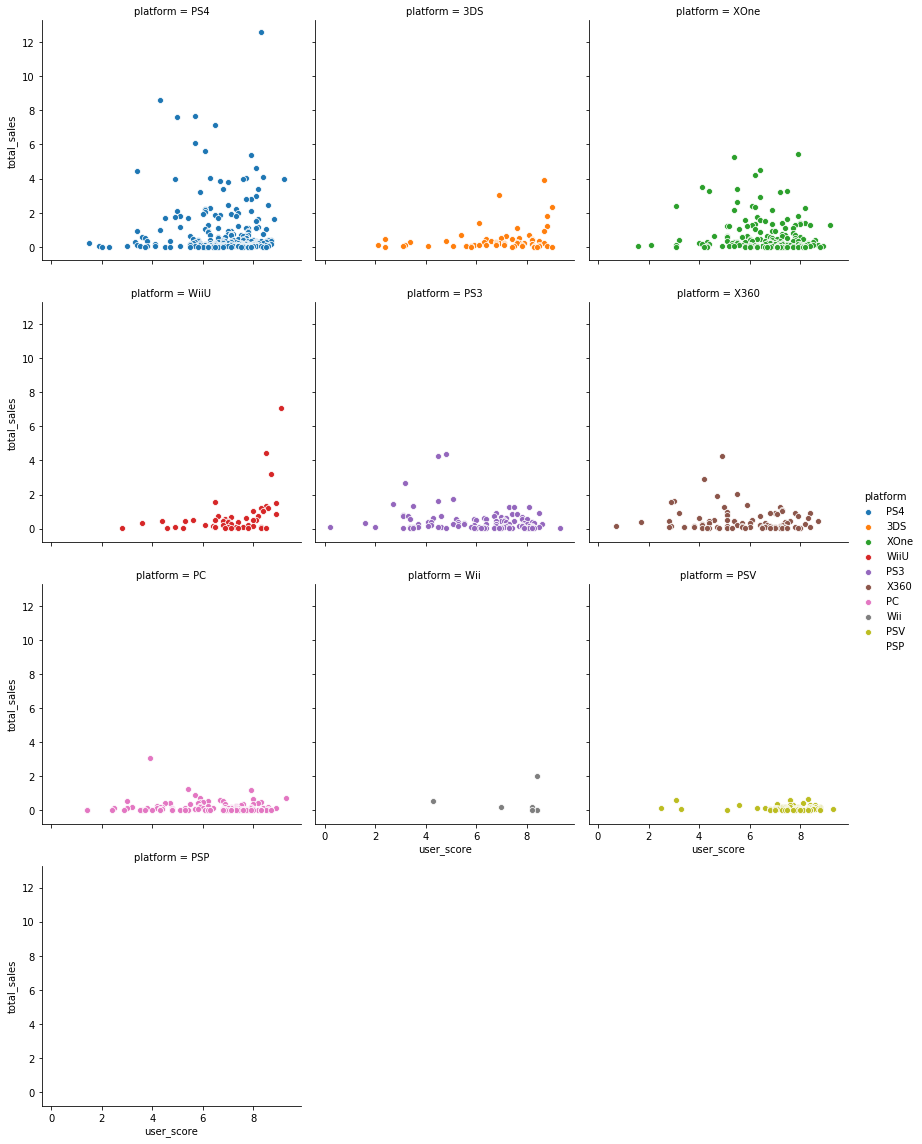

In [28]:
# Построение диаграммы рассеяния для остальных платформ по отзывам пользователей.
platform = sns.FacetGrid(data=platform_data, col='platform', hue='platform', col_wrap=3, height=4)
platform.map(sns.scatterplot, 'user_score', 'total_sales')
platform.add_legend()
plt.show()

Для остальных платформ зависимость схожа с зависимостью для платформы PS4. Игры с более высоким рейтингом чаще покупают.

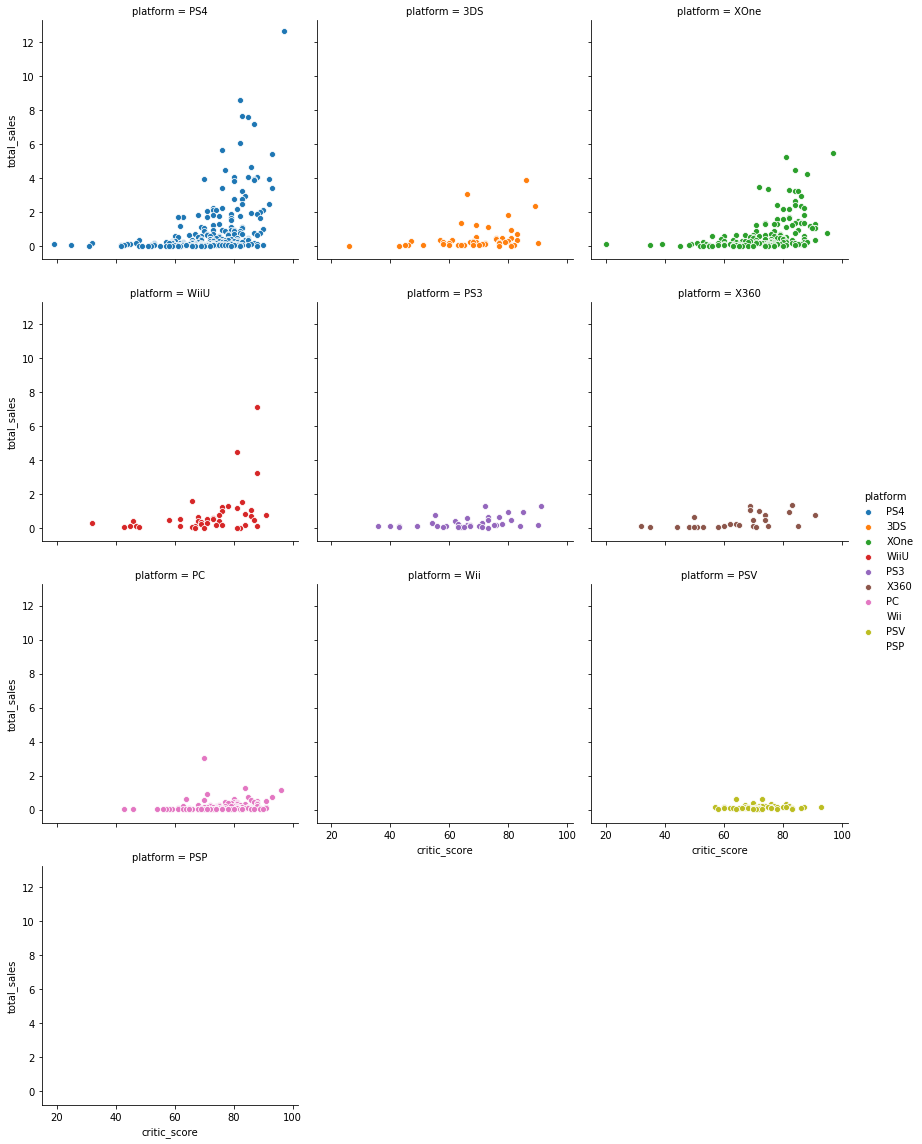

In [29]:
# Построение диаграммы рассеяния для остальных платформ по отзывам критиков.
platform = sns.FacetGrid(data=platform_data, col='platform', hue='platform', col_wrap=3, height=4)
platform.map(sns.scatterplot, 'critic_score', 'total_sales')
platform.add_legend()
plt.show()

Для остальных платформ зависимость количества продаж от рейтинга критиков такая же как и для платфоормы PS4. Игры с более высоким рейтингом чаще покупают.

In [30]:
games_data_actual[['user_score', 'critic_score', 'total_sales']].corr()

,user_score,critic_score,total_sales
user_score,1.000000,0.502159,-0.012385
critic_score,0.502159,1.000000,0.328105
total_sales,-0.012385,0.328105,1.000000


Есть линейная зависимость между количеством проданных игр и отзывами критиков, но нет такой зависимости между отзывами пользователей и продажами.

### Жанры игр.

Text(0, 0.5, 'Количество продаж, млн. копий.')

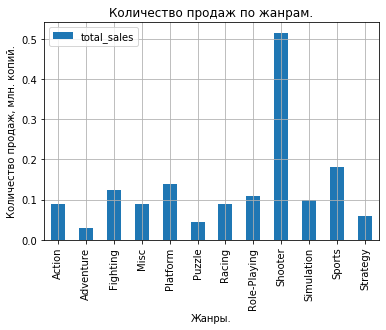

In [31]:
# Построение столбчатой диаграммы количества продаж по жанрам игр.
(games_data_actual.pivot_table(index='genre', values='total_sales', aggfunc='median')
     .plot(kind='bar', grid=True))
plt.title('Количество продаж по жанрам.')
plt.xlabel('Жанры.')
plt.ylabel('Количество продаж, млн. копий.')

Жанр с наибольшей прибылью это shooter. Также хорошо продаются жанры sports, platform, fighting и role-playing.

### Вывод.

Был проведён исследовательский анализ данных и выполнены следующие пункты:
1. Построен график, отражающий количество проданных игр в зависимости от года выпуска.
2. Исследовано изменение продаж по платформам, определён актуальный цикл жизни отдельной платформы (примерно 10 лет), определены наиболее перспективные платформы (PS4, XOne, 3DS и PC), исследованы распределения данных для этих платформ.
3. Была определена зависимость количества проданных копий игр от рейтинга пользователей и критиков. Чем выше рейтинг игры, тем чаще её покупают.
4. Определены наиболее прибыльные жанры игр. В целом игроки чаще покупают динамичные игры таких жанров как: shooter, sports, platform, fighting и role-playing.


## Портрет пользователей.

При составлении портрета пользователей необходимо определить для пользователя каждого региона (NA, EU, JP):
1. Самые популярные платформы (топ-5).
2. Самые популярные жанры (топ-5).
3. Влияет ли рейтинг ESRB на продажи в отдельном регионе? 

### Платформы.

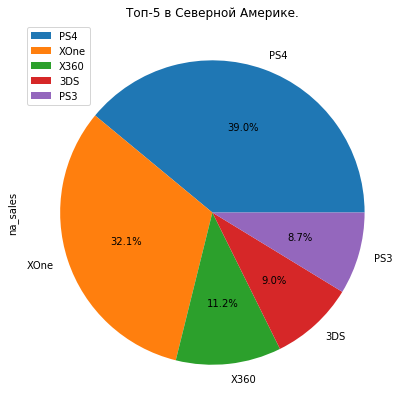

In [32]:
# Топ-5 для Северной Америки.
(games_data_actual.groupby('platform').agg({'na_sales': 'sum'}).sort_values(by='na_sales', ascending=False).head()
     .plot(kind='pie', x='platform', y='na_sales', autopct='%1.1f%%', figsize=(7, 7), title='Топ-5 в Северной Америке.'))
plt.show()

В Северной Америке наиболее популярны платформы PS4 и XOne. Игры для этих платформ покупают почти в 3-4 раза больше чем для PS3, 3DS и X360.

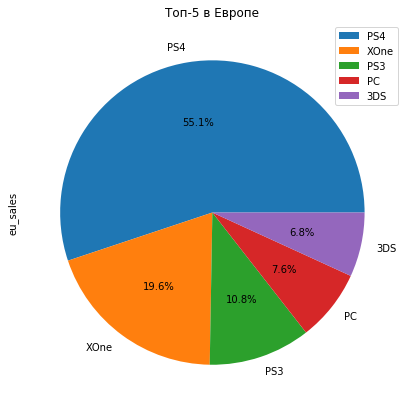

In [33]:
# Топ-5 для Европы.
(games_data_actual.groupby('platform').agg({'eu_sales': 'sum'}).sort_values(by='eu_sales', ascending=False).head()
    .plot(kind='pie', x='platform', y='eu_sales', autopct='%1.1f%%', figsize=(7, 7), title='Топ-5 в Европе'))
plt.show()

В Европе наиболее популярна платформа PS4. Игры для этой платформы покупает каждый 2-ой европеец. Ближайший преследователь это платформа XOne, её покупает каждый 5-й европеец. Доля продаж остальных платформ для Европы составляет менее 10%.

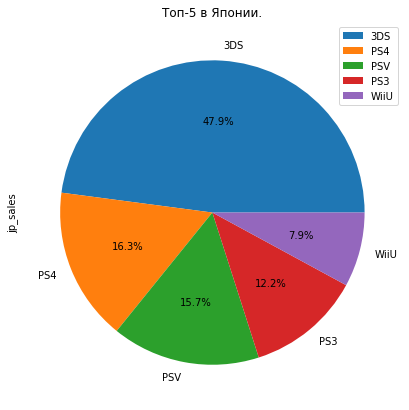

In [34]:
# Топ-5 для Японии.
(games_data_actual.groupby('platform').agg({'jp_sales': 'sum'}).sort_values(by='jp_sales', ascending=False).head()
    .plot(kind='pie', x='platform', y='jp_sales', autopct='%1.1f%%', figsize=(7, 7), title='Топ-5 в Японии.'))
plt.show()

В Японии наиболее популярна 3DS, которую покупает каждый 2-ой японец. Платформы PS4 и PSV продаются в 3 раза хуже, а PS3 в 4. Хуже всех дела обстоят у платформы WiiU, она продаётся в 6 раз хуже 3DS.

### Жанры.

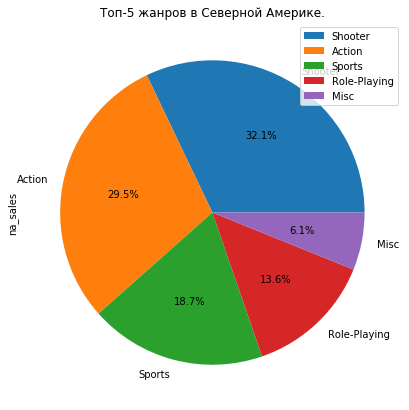

In [35]:
# Топ-5 жанров для Северной Америки.
(games_data_actual.groupby('genre').agg({'na_sales': 'sum'}).sort_values(by='na_sales', ascending=False).head()
    .plot(kind='pie', x='genre', y='na_sales', autopct='%1.1f%%', figsize=(7, 7), title='Топ-5 жанров в Северной Америке.'))
plt.show()

В Северной Америке пользователи отдают предпочтение играм таких жанров как shooter и action, их покупают в 1.5 раза чаще чем sports, в 2 раза чаще чем role-playing и 5 раз чаще чем misc.

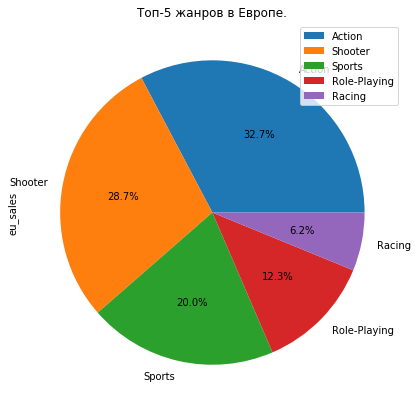

In [36]:
# Топ-5 жанров для Европы.
(games_data_actual.groupby('genre').agg({'eu_sales': 'sum'}).sort_values(by='eu_sales', ascending=False).head()
    .plot(kind='pie', x='genre', y='eu_sales', autopct='%1.1f%%', figsize=(7, 7), title='Топ-5 жанров в Европе.'))
plt.show()

В Европе у игроков схожие вкусы, также самыми популярными жанрами являются action и shooter. Игры жанра sports тоже хорошо продаются, всего в 1.5 раза хуже вышеупомянутых жанров. Игры role-playing продаются в 2.5 раза хуже чем action и sports, а racing - в 5 раз хуже.

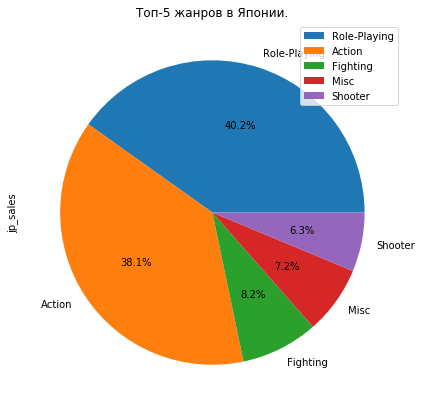

In [37]:
# Топ-5 жанров для Японии.
(games_data_actual.groupby('genre').agg({'jp_sales': 'sum'}).sort_values(by='jp_sales', ascending=False).head()
    .plot(kind='pie', x='genre', y='jp_sales', autopct='%1.1f%%', figsize=(7, 7), title='Топ-5 жанров в Японии.'))
plt.show()

В Японии совсем иная картина. Наиболее популярные жанры игр это role-playing и action. Игры остальных жанров (shooter, misc и fighting), входящих в топ-5, в 6-8 раз менее популярны.

### Рейтинг ESRB.

В рейтинге ESRB существует несколько категорий:
- AO (Adults only 18+) — только для взрослых
- E - everyone - для всех
- M (Mature 17+) — от 17 лет
- T (Teen) — для подростков 13-19 лет
- K-A (Kids to Adults)— для детей и взрослых
- E10+ (Everyone 10+) — для всех старше 10 лет
- EC (Early Childhood) — для детей младшего возраста
- RP (Rating pending) — рейтинг ожидается

Text(0, 0.5, 'Количество продаж в Северной Америке.')

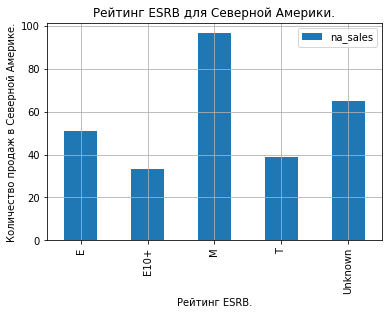

In [38]:
# Рейтинг ESRB для Северной Америки.
((games_data.query('year_of_release>=2014'))
    .groupby('rating').agg({'na_sales': 'sum'})
    .plot(kind='bar', grid=True))
plt.title('Рейтинг ESRB для Северной Америки.')
plt.xlabel('Рейтинг ESRB.')
plt.ylabel('Количество продаж в Северной Америке.')

В Северной Америке наиболее популярны игры с рейтингом M (от 17 лет). Игры с рейтингом E (для всех), E10+ (для всех старше 10 лет) и T (для подростков 13-19 лет) покупают реже в 2-3 раза. Игры без рейтинга покупает значительное количество игроков, они находятся на втором месте по популярности после игр с рейтингом E.

Text(0, 0.5, 'Количество продаж в Европе.')

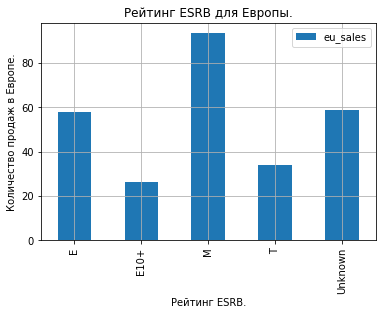

In [39]:
# Рейтинг ESRB для Европы.
((games_data.query('year_of_release>=2014'))
    .groupby('rating').agg({'eu_sales': 'sum'})
    .plot(kind='bar', grid=True))
plt.title('Рейтинг ESRB для Европы.')
plt.xlabel('Рейтинг ESRB.')
plt.ylabel('Количество продаж в Европе.')

В Европе картина схожая, но игры с рейтингом M (от 17 лет) продаются в 3 раза больше чем игры с рейтингами E10+ (для всех старше 10 лет) и T (для подростков 13-19 лет). Игры без рейтинга также популярны как и гры с рейтингом E (для всех), то есть в 2 раза хуже самых популярных игр с рейтингом M (от 17 лет).

Text(0, 0.5, 'Количество продаж в Японии.')

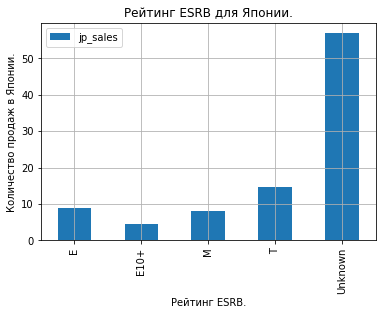

In [40]:
# Рейтинг ESRB для Японии.
((games_data.query('year_of_release>=2014'))
    .groupby('rating').agg({'jp_sales': 'sum'})
    .plot(kind='bar', grid=True))
plt.title('Рейтинг ESRB для Японии.')
plt.xlabel('Рейтинг ESRB.')
plt.ylabel('Количество продаж в Японии.')

В Японии основную часть игр покупают без возрастного рейтинга. Остальные игры с рейтингоми T (для подростков 13-19 лет), E (для всех), E10+ (для всех старше 10 лет) и M (от 17 лет), продаются в 5-6 раз хуже.

### Вывод.

 * Был определён портрет пользователей по трём регионам - Северная Америка, Европа и Япония. 
 * Пользователи Северной Америки и Европы схожи между собой. Они предпочитают примерно одни и теже платформы и жанры игр.
 * Пользователи из Японии значительно отличаются как по жанрам так и по предпочтениям в выборе игровых платформ.
 * Такое поведение игроков можно наблюдать и при расмотрении возрастного рейтинга для игр. В Японии основную долю продаж составляют игры без рейтинга. А в Северной Америке и Европе основную часть игр покупают пользователи старше 17 лет.

## Гипотезы.

На данном этапе проекта будут проверены гипотезы:
1. Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
2. Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

### Рейтинг Xbox One и PC.

Формулировка нулевой и альтернативной гипотез:
 - Нулевая гипотеза - средние пользовательские рейтинги платформ Xbox One и PC одинаковые.
 - Альтернативная гипотеза - средние пользовательские рейтинги платформ Xbox One и PC разные.

Необходимо проверить гипотезу о равенстве среднего двух генеральных совокупностей. Для этого выполняется t-test с условием равенства дисперсий в сравниваемых выборках.

In [41]:
# Создание срезов для платформ Xbox One и PC.
sample_1 = games_data.query('year_of_release>=2014 and platform=="XOne" and user_score.isna()!=True')
sample_2 = games_data.query('year_of_release>=2014 and platform=="PC" and user_score.isna()!=True')

In [46]:
# Прверка дисперсий выборок.
sample_1['user_score'].describe()

count    168.000000
mean       6.597024
std        1.366206
min        1.600000
25%        5.800000
50%        6.800000
75%        7.625000
max        9.200000
Name: user_score, dtype: float64

In [47]:
sample_2['user_score'].describe()

count    123.000000
mean       6.314634
std        1.705857
min        1.400000
25%        5.350000
50%        6.800000
75%        7.600000
max        9.300000
Name: user_score, dtype: float64

Дисперсии различаются, поэтому параметр равенства необходимо задать False.

In [48]:
alpha = .05 # критический уровень статистической значимости
# если p-value окажется меньше него - отвергнем гипотезу

results = st.ttest_ind(sample_1['user_score'], sample_2['user_score'], equal_var=False, nan_policy='omit')

print('p-значение: ', results.pvalue)
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу.')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение:  0.13130164268728325
Не получилось отвергнуть нулевую гипотезу


Проведённый тест показал, что нулевую гипотезу следует принять.

### Рейтинг жанров Action и Sports.

Формулировка нулевой и альтернативной гипотез:
 - Нулевая гипотеза - средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.
 - Альтернативная гипотеза - средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports англ. «спортивные соревнования») одинаковые.

Здесь также необходимо проверить гипотезу о равенстве среднего двух генеральных совокупностей. Для этого выполняется t-test с условием равенства дисперсий в сравниваемых выборках.

In [49]:
# Создание срезов для жанров Action и Sports.
sample_1 = games_data.query('year_of_release>=2014 and genre=="Action" and user_score.isna()!=True')
sample_2 = games_data.query('year_of_release>=2014 and genre=="Sports" and user_score.isna()!=True')

In [50]:
sample_1['user_score'].describe()

count    313.000000
mean       6.753355
std        1.411240
min        2.000000
25%        6.100000
50%        7.100000
75%        7.800000
max        9.000000
Name: user_score, dtype: float64

In [51]:
sample_2['user_score'].describe()

count    131.000000
mean       5.291603
std        1.889039
min        0.200000
25%        4.050000
50%        5.600000
75%        6.750000
max        9.300000
Name: user_score, dtype: float64

Дисперсии различаются, поэтому параметр равенства необходимо задать False.

In [52]:
alpha = .05 # критический уровень статистической значимости
# если p-value окажется меньше него - отвергнем гипотезу

results = st.ttest_ind(sample_1['user_score'], sample_2['user_score'], equal_var=False)

print('p-значение: ', results.pvalue)
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу.')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение:  1.3080710852425688e-13
Отвергаем нулевую гипотезу.


Проведённый тест показал, что нулевую гипотезу следует отвергнуть.

### Вывод.

Результаты проверок обеих гипотез показали, что рейтинг пользователей для выбранных платформ (Xbox One и PC) за актуальный период различается, а для выбранных жанров (Action и Sports), также за актуальный период, не отличается. 

## Общий вывод.

В данной работе был проведён анализ данных по продажам игр на различных игровых платформах за годы с 1980 по 2016. Цель иследования - отработать принцип работы с даннми и с планировать кампанию на будущий год.

При первичном изучении данных были обнаружены ошибки: не верное название столбцов, не верный тип данных в столбце 'year_of_release', пропуски. 

Перед дальнейшим исследованием была проведена предобработка данных: заменены названия столбцов, изменён тип данных в столбце 'year_of_release', пропуски было решено оставить, что бы не искажать данные, так как не было найдено правильного способа для их заполнения. Также была посчитана сумма продаж по всем регионам.

Анализ данных позволил выявить наиболее продаваемые платформы, а также была определена зависимость количества продаж от рейтинга пользователей и критиков. Результатом анализа данных стало то, что было выделено 7 популярных платформ (DS, PS, PS2, PS3, PS4, Wii и Xbox360), определено среднее время жизни отдельной платформы и актуальный период (когда платформа находится на пике продаж или растёт). Была получена положительная зависимость количества продаж от рейтинга пользователей и критиков. Также были определены наиболее проадаваемые жанры игр.

Далее был составлен портрет пользователей по регионам, показавший, что поведение пользователей в Европе и Северной Америке примерно одинаково, а вот пользователи в Японии сильно отличаются.

Проверены две гипотезы о различии или сходстве среднего пользовательского рейтинга для двух платформ (Xbox One и PC) и для наиболее популярных жанров игр (Action и Sports). Результат проверки в обоих случаях показал, что средние рейтинги пользователей для платформ и для жанров не различаются.